# MC vs signal peak of data

Goal: Compare the training variables for the MCc and the MCe, where
- `MCc`: old version of LHCb simulated data
- `MCe`: new version of LHCb simulated data

The purpose of this is to check if we can use `MCc` for the training of the BDTs.

In [1]:
from bd2dst3pi.locations import loc
from bd2dst3pi.definition import years, magnets
from bd2dst3pi.pandas_root import load_data, add_constr_Dst

import sys
sys.path.append(loc.ROOT + 'library/')

from HEA.plot import plot_hist_auto, plot_hist
from HEA.tools import show_dictionnary
from HEA.plot.tools import save_fig
from HEA.pandas_root import save_root, load_saved_root, get_dataframe_from_raw_branches_functions

from HEA import (
    get_branches_from_raw_branches_functions,
    get_raw_branches_from_raw_branches_functions
)

Welcome to JupyROOT 6.22/02


In [2]:
from numpy import log

In [3]:
data_name = 'common_B0TODst3pi_Dst_constr'
branch = 'Dst_constr_B0_M'

## Load data

### Variables

In [4]:
raw_branches_functions = [
    'B0_ETA',
    ('B0_DIRA_OWNPV', 'ln(1-x)'),
    (('B0_ENDVERTEX_CHI2', 'B0_ENDVERTEX_NDOF'), 'x/y'),
    'B0_PT',
    ('B0_FDCHI2_OWNPV', 'ln(x)'),
    'B0_IP_OWNPV',
    'B0_FD_OWNPV',

    'Dst_ETA',
    ('Dst_DIRA_OWNPV', 'ln(1-x)'),
    'Dst_PT',
    ('Dst_FDCHI2_OWNPV', 'ln(x)'),
    ('Dst_IPCHI2_OWNPV', 'ln(x)'),
    'Dst_IP_OWNPV',
    'Dst_FD_OWNPV',

    'D0_ETA',
    ('D0_DIRA_OWNPV', 'ln(1-x)'),
    (('D0_ENDVERTEX_CHI2', 'D0_ENDVERTEX_NDOF'), 'x/y'),
    'D0_PT',
    ('D0_FDCHI2_OWNPV', 'ln(x)'),
    ('D0_IPCHI2_OWNPV', 'ln(x)'),
    'D0_IP_OWNPV',
    'D0_FD_OWNPV',

    'tau_ETA',
    ('tau_DIRA_OWNPV', 'ln(1-x)'),
    (('tau_ENDVERTEX_CHI2', 'tau_ENDVERTEX_NDOF'), 'x/y'), 
    'tau_PT',
    ('tau_FDCHI2_OWNPV', 'ln(x)'),
    ('tau_IPCHI2_OWNPV', 'ln(x)'),
    'tau_IP_OWNPV',
    'tau_FD_OWNPV',

    'Dst_pion_ETA',
    'Dst_pion_PT',
    ('Dst_pion_IPCHI2_OWNPV', 'ln(x)'),

    'D0_kaon_ETA',
    'D0_kaon_PT',
    ('D0_kaon_IPCHI2_OWNPV', 'ln(x)'),

    'D0_pion_ETA',
    'D0_pion_PT',
    ('D0_pion_IPCHI2_OWNPV', 'ln(x)')
]

In [5]:
raw_branches = get_raw_branches_from_raw_branches_functions(raw_branches_functions)
# print(variables)

In [6]:
branches = get_branches_from_raw_branches_functions(raw_branches_functions)

In [7]:
add_branches = ['tau_M', 'Dst_M', 'D0_M', 'B0_M']

In [8]:
df = {}

In [9]:
df['MCc'] = load_data(years, magnets, 'MCc', vars=raw_branches+add_branches)
df['MCe'] = load_data(years, magnets, 'MC', vars=raw_branches+add_branches)
# df['MC']  = add_constr_Dst(df['MC'])

Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09c-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09c-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09c-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09c-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
Loading /eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Ds

In [10]:
df['MCc'] = add_constr_Dst(df['MCc'])

In [11]:
df['MCe'] = add_constr_Dst(df['MCe'])

In [12]:
df['training_MCc'] = get_dataframe_from_raw_branches_functions(df['MCc'], raw_branches_functions)
df['training_MCe'] = get_dataframe_from_raw_branches_functions(df['MCe'], raw_branches_functions)

/afs/cern.ch/work/c/correian/miniconda/envs/bd2dst3pi_env/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Compare `MCc` and `MCe`

### Range of the variables

In [13]:
range_dic = {
    'B0_PT': [0,35000],
    'Dst_PT':[0,30000],
    'tau_PT':[0,18000],
    'Dst_pion_PT':[0,2300],
    'Dst_kaon_PT':[0,2300],
    'D0_pion_PT':[0,20000],
    'D0_kaon_PT':[0,20000],
    'D0_PT':[0,3000],
    'B0_ENDVERTEX_CHI2':[0,60],
    'tau_ENDVERTEX_CHI2':[None,None],
    'B0_OWNPV_CHI2':[None,None],    
    'B0_FDCHI2_OWNPV':[0, 13000], 
    'B0_DIRA_OWNPV':[0.99996, 1], 
    'Dst_IPCHI2_OWNPV':[0, 2000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_kaon_IPCHI2_OWNPV':[0, 20000], 
    'D0_pion_IPCHI2_OWNPV':[0, 20000], 
    'pion_IPCHI2_OWNPV':[0, 2000], 
    'tau_FDCHI2_OWNPV':[0, 200000], 
    'tau_FD_OWNPV':[0, 500], 
    'tau_pion0_TRACK_CHI2NDOF':[None,None], 
    'tau_pion1_TRACK_CHI2NDOF':[None,None], 
    'tau_pion2_TRACK_CHI2NDOF':[None,None],
    'D0_ENDVERTEX_CHI2,D0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_ENDVERTEX_CHI2,B0_ENDVERTEX_NDOF:x/y':[0, 10],
    'B0_IP_OWNPV':[0, 0.1], 
    'D0_IP_OWNPV':[0, 2], 
    'Dst_IP_OWNPV':[0, 2], 
    'tau_IP_OWNPV':[0, 4], 
    'B0_FD_OWNPV':[0, 100], 
    'Dst_FD_OWNPV':[0, 200], 
    'tau_FD_OWNPV':[0, 150], 
    'D0_FD_OWNPV':[0, 200], 
}

### Plots

=====================  B0_DIRA_OWNPV:ln(1-x) =====================


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MCc_MCe/variables/B0_DIRA_OWNPV:ln(1-x)_Signal_Background


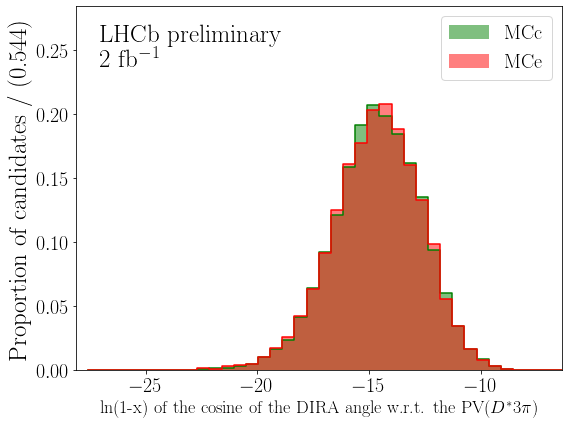

In [17]:
for branch in ['B0_DIRA_OWNPV:ln(1-x)']:
    print(f"=====================  {branch} =====================")
    
    if branch in range_dic:
        low = range_dic[branch][0]
        high = range_dic[branch][1]
    else:
        low = None
        high = None
        
    fig, ax = plot_hist_auto({'MCc': df['training_MCc'], 'MCe': df['training_MCe']}, branch, alpha=0.5, 
                         n_bins=40, bar_mode = True, colors=['g', 'r'], low=None, high=None, 
                         pos_text_LHC=[0.05, 0.95, 'left'], 
                         show_ncounts=False, save_fig=False)
    save_fig(fig, f'{branch}_Signal_Background',folder_name=f'MCc_MCe/variables/')

=====================  B0_ETA =====================
Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MCc_MCe/B0_ETA_MCc_MCe


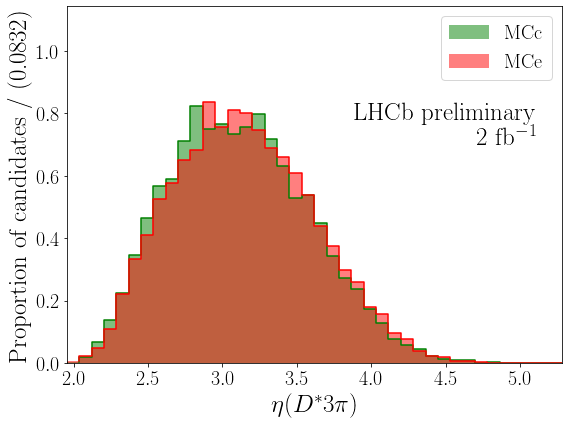

In [19]:
for branch in branches:
    print(f"=====================  {branch} =====================")
    
    if branch in range_dic:
        low = range_dic[branch][0]
        high = range_dic[branch][1]
    else:
        low = None
        high = None
    
    fig, ax = plot_hist_auto({'MCc': df['training_MCc'], 'MCe': df['training_MCe']}, branch, alpha=0.5, 
                         n_bins=40, bar_mode = True, colors=['g', 'r'], low=low, high=high, 
                         pos_text_LHC=[0.95, 0.73, 'right'], 
                         show_ncounts=False)

Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//MCc_MCe/B0_ETA_MCc_MCe


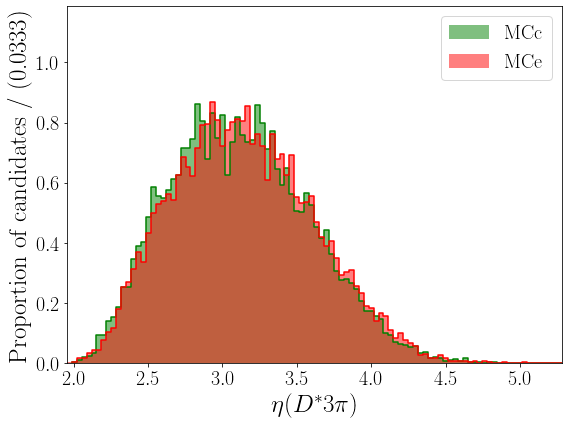

In [20]:
fig, ax = plot_hist_auto({'MCc': df['MCc'], 'MCe': df['MCe']}, branch, alpha=0.5, 
                         n_bins=100, bar_mode = True, colors=['g', 'r'], low=None, high=None, 
                         show_ncounts=False)